In [5]:
from sagas.train.parallel_corpus import ParallelCorpus
pc=ParallelCorpus()
rs=pc.load_corpus()
pc.samples

[("I knew you'd be mad.", '君は怒るだろうとわかっていたよ。'),
 ('Same-sex marriage is legal here.', 'この州では同性婚は合法だ。')]

In [7]:
prefix='/pi/ai/seq2seq/'
pc=ParallelCorpus()
rs_zh=pc.load_corpus(f"{prefix}/cmn-eng/cmn.txt")
pc.samples

[('Now tell us what we want to know.', '现在告诉我们我们想知道的。'),
 ('Tom is coming to our school tomorrow.', '湯姆明天會來我們的學校。')]

In [10]:
def samples(count, file):
    pc=ParallelCorpus()
    pc.samples_count=count
    rs_zh=pc.load_corpus(f"{prefix}{file}")
    return pc.samples

samples(5, 'en_Persian/pes-eng/pes.txt')

[("Hasn't anyone seen Tom?", 'کسی تام را ندیده است؟'),
 ('Business is business.', 'حساب حساب کاکا برادر.'),
 ('What did you do this morning?', 'امروز صبح چکار کردی؟'),
 ('Tom bends over backwards to make Mary happy.',
  'تام پل\u200cمی\u200cزند تا ماری را خوشحال کند.'),
 ('Is the water hot enough to make the tea?',
  'آیا برای تهیه چای، آب به اندازه کافی داغ است؟')]

In [11]:
samples(5, 'ara-eng/ara.txt')

[('Why do I have to do this by myself?', 'لم علي القيام بذلك بنفسي؟'),
 ('A fire broke out near my house.', 'اندلع حريق قرب منزلي.'),
 ('We live in the atomic age.', 'إنا نعيش في عصر الذّرّة.'),
 ('Stay positive.', 'كن ايجابي'),
 ('She finally found her missing keys.', 'وأخيرًا وجدت مفاتيحها المفقودة.')]

('Come alone.', 'تعالَ وحدك.')
index: 1	text: تعالَ 	lemma: تَعَالَى	upos: X	xpos: U---------
index: 2	text: و 	lemma: وَ	upos: CCONJ	xpos: C---------
index: 3	text: حدك 	lemma: حَدَّك	upos: INTJ	xpos: I---------
index: 4	text: . 	lemma: .	upos: PUNCT	xpos: G---------
تعالَ -> root, 0, _root_
و -> cc, 3, حدك
حدك -> conj, 1, تعالَ
. -> punct, 1, تعالَ
('تعالَ', '0', 'root')
('و', '3', 'cc')
('حدك', '1', 'conj')
('.', '1', 'punct')


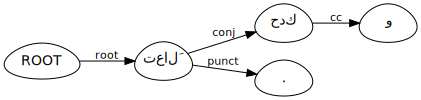

In [40]:
from sagas.nlu.uni_cli import UniCli
from sagas.nlu.uni_viz import EnhancedViz
from sagas.nlu.corenlp_parser import get_chunks
from sagas.tool.misc import print_stem_chunks
import sagas

serial_numbers='❶❷❸❹❺❻❼❽❾❿'
def viz_sample(lang, sents, engine='corenlp'):
    uni=UniCli()
    doc=uni.parsers[engine](lang, sents)
    rs = get_chunks(doc)
    for serial, r in enumerate(rs):
        df = sagas.to_df(r['domains'], ['rel', 'index', 'text', 'lemma', 'children', 'features'])
        if 'head' in r:
            cla="%s(%s)"%(r['head'], r['head_pos'])
        else:
            cla='_'
        print(serial_numbers[serial], '%s(%s)' % (r['type'], r['lemma']), cla)
        # sagas.print_df(df)
        display(df)
        print_stem_chunks(r)

    cv = EnhancedViz(shape='egg', size='8,5', fontsize=20)
    return cv.analyse_doc(doc, None)

sents_p=samples(1, 'ara-eng/ara.txt')[0]
print(sents_p)
sents=sents_p[1]
viz_sample('ar', sents)

In [ ]:
sents_p=samples(1, 'jpn-eng-2019/jpn.txt')[0]
print(sents_p)
sents=sents_p[1]
viz_sample('ja', sents)

aux_domains(be) it(pron)


,rel,index,text,lemma,children,features
0,cop,3,is,be,[is],"[c_aux, x_vbz]"


index: 1	text: what 	lemma: what	upos: DET	xpos: WDT
index: 2	text: time 	lemma: time	upos: NOUN	xpos: NN
index: 3	text: is 	lemma: be	upos: AUX	xpos: VBZ
index: 4	text: it 	lemma: it	upos: PRON	xpos: PRP
index: 5	text: ? 	lemma: ?	upos: PUNCT	xpos: .
what -> det, 2, time
time -> root, 0, _root_
is -> cop, 4, it
it -> nsubj, 2, time
? -> punct, 2, time
('what', '2', 'det')
('time', '0', 'root')
('is', '4', 'cop')
('it', '2', 'nsubj')
('?', '2', 'punct')


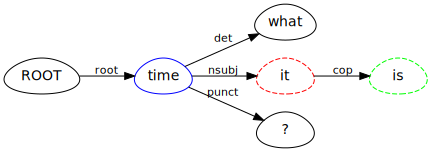

In [31]:
sents='what time is it ?'
viz_sample('en', sents)

verb_domains(be) _


,rel,index,text,lemma,children,features
0,attr,2,time,time,"[what, time]","[c_noun, x_nn]"
1,nsubj,4,it,-PRON-,[it],"[c_pron, x_prp]"
2,punct,5,?,?,[?],"[c_punct, x_.]"


attr -> what time
index: 1	text: what 	lemma: what	upos: ADJ	xpos: WDT
index: 2	text: time 	lemma: time	upos: NOUN	xpos: NN
index: 3	text: is 	lemma: be	upos: VERB	xpos: VBZ
index: 4	text: it 	lemma: -PRON-	upos: PRON	xpos: PRP
index: 5	text: ? 	lemma: ?	upos: PUNCT	xpos: .
what -> det, 2, time
time -> attr, 3, is
is -> root, 0, _root_
it -> nsubj, 3, is
? -> punct, 3, is
('what', 2, 'det')
('time', 3, 'attr')
('is', 0, 'root')
('it', 3, 'nsubj')
('?', 3, 'punct')


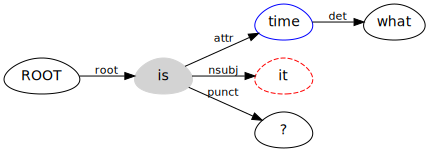

In [33]:
sents='what time is it ?'
viz_sample('en', sents, engine='spacy')

aux_domains(だ) 何(num)


,rel,index,text,lemma,children,features
0,obl,1,今,今,[今],[c_noun]
1,mark,3,時,時,[時],[c_noun]
2,cop,4,です,だ,[です],[c_aux]
3,mark,5,か,か,[か],[c_part]
4,punct,6,?,?,[?],[c_punct]


index: 1	text: 今 	lemma: 今	upos: NOUN	xpos: _
index: 2	text: 何 	lemma: 何	upos: NUM	xpos: _
index: 3	text: 時 	lemma: 時	upos: NOUN	xpos: _
index: 4	text: です 	lemma: だ	upos: AUX	xpos: _
index: 5	text: か 	lemma: か	upos: PART	xpos: _
index: 6	text: ? 	lemma: ?	upos: PUNCT	xpos: _
今 -> obl, 2, 何
何 -> root, 0, _root_
時 -> mark, 2, 何
です -> cop, 2, 何
か -> mark, 2, 何
? -> punct, 2, 何
('今', '2', 'obl')
('何', '0', 'root')
('時', '2', 'mark')
('です', '2', 'cop')
('か', '2', 'mark')
('?', '2', 'punct')


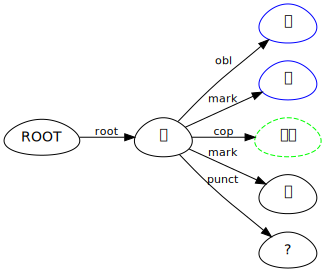

In [30]:
viz_sample('ja', "今何時ですか?")

verb_domains(现) _


,rel,index,text,lemma,children,features
0,xcomp,2,在是,在是,[在是],"[c_verb, x_vv]"
1,obj,3,几点,几点,[几点],"[c_noun, x_nn]"
2,punct,4,?,?,[?],"[c_punct, x_.]"


index: 1	text: 现 	lemma: 现	upos: VERB	xpos: VV
index: 2	text: 在是 	lemma: 在是	upos: VERB	xpos: VV
index: 3	text: 几点 	lemma: 几点	upos: NOUN	xpos: NN
index: 4	text: ? 	lemma: ?	upos: PUNCT	xpos: .
现 -> root, 0, _root_
在是 -> xcomp, 1, 现
几点 -> obj, 1, 现
? -> punct, 1, 现
('现', '0', 'root')
('在是', '1', 'xcomp')
('几点', '1', 'obj')
('?', '1', 'punct')


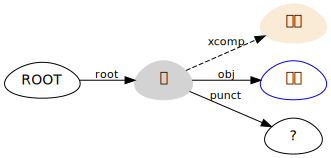

In [29]:
viz_sample('zh', '现在是几点?')

是 --> 现在|ADV|nt|O
? --> 是|HED|v|O
点 --> 几|ATT|m|O
是 --> 点|VOB|q|O
是 --> ?|WP|wp|O
verb_domains(是) _


,rel,index,text,lemma,children,features
0,adv,1,现在,现在,[现在],"[c_noun, x_nt]"
1,vob,4,点,点,"[几, 点]","[c_x, x_q]"
2,wp,5,?,?,[?],"[c_punct, x_wp]"


vob -> 几 点
index: 1	text: 现在 	lemma: 现在	upos: NOUN	xpos: nt
index: 2	text: 是 	lemma: 是	upos: VERB	xpos: v
index: 3	text: 几 	lemma: 几	upos: NUM	xpos: m
index: 4	text: 点 	lemma: 点	upos: X	xpos: q
index: 5	text: ? 	lemma: ?	upos: PUNCT	xpos: wp
现在 -> adv, 2, 是
是 -> hed, 0, _root_
几 -> att, 4, 点
点 -> vob, 2, 是
? -> wp, 2, 是
('现在', 2, 'adv')
('是', 0, 'hed')
('几', 4, 'att')
('点', 2, 'vob')
('?', 2, 'wp')


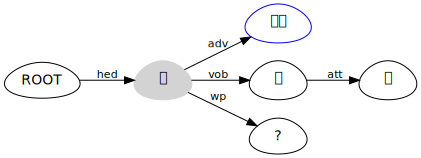

In [32]:
viz_sample('zh', '现在是几点?', engine='ltp')

点 --> 现在|ATT|nt|O
点 --> 几|ATT|m|O
? --> 点|HED|q|O
点 --> ?|WP|wp|O
index: 1	text: 现在 	lemma: 现在	upos: NOUN	xpos: nt
index: 2	text: 几 	lemma: 几	upos: NUM	xpos: m
index: 3	text: 点 	lemma: 点	upos: X	xpos: q
index: 4	text: ? 	lemma: ?	upos: PUNCT	xpos: wp
现在 -> att, 3, 点
几 -> att, 3, 点
点 -> hed, 0, _root_
? -> wp, 3, 点
('现在', 3, 'att')
('几', 3, 'att')
('点', 0, 'hed')
('?', 3, 'wp')


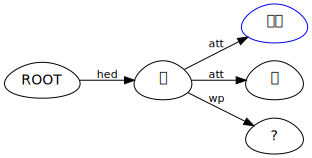

In [45]:
viz_sample('zh', '现在几点?', engine='ltp')

❶ verb_domains(现) _


,rel,index,text,lemma,children,features
0,mark,2,在,在,[在],"[c_verb, x_vv]"
1,obj,3,几点,几点,[几点],"[c_noun, x_nn]"
2,punct,4,?,?,[?],"[c_punct, x_.]"


❷ verb_domains(在) _


,rel,index,text,lemma,children,features


index: 1	text: 现 	lemma: 现	upos: VERB	xpos: VV
index: 2	text: 在 	lemma: 在	upos: VERB	xpos: VV
index: 3	text: 几点 	lemma: 几点	upos: NOUN	xpos: NN
index: 4	text: ? 	lemma: ?	upos: PUNCT	xpos: .
现 -> root, 0, _root_
在 -> mark, 1, 现
几点 -> obj, 1, 现
? -> punct, 1, 现
('现', '0', 'root')
('在', '1', 'mark')
('几点', '1', 'obj')
('?', '1', 'punct')


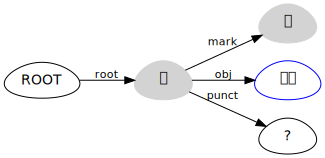

In [47]:
viz_sample('zh', '现在几点?', engine='corenlp')

verb_domains(have) _


,rel,index,text,lemma,children,features
0,obj,3,laptops,laptop,"[How, many, laptops]","[c_noun, x_nns]"
1,aux,4,do,do,[do],"[c_aux, x_vbp]"
2,nsubj,5,you,you,[you],"[c_pron, x_prp]"
3,punct,7,?,?,[?],"[c_punct, x_.]"


obj -> how many laptop
index: 1	text: How 	lemma: how	upos: ADV	xpos: WRB
index: 2	text: many 	lemma: many	upos: ADJ	xpos: JJ
index: 3	text: laptops 	lemma: laptop	upos: NOUN	xpos: NNS
index: 4	text: do 	lemma: do	upos: AUX	xpos: VBP
index: 5	text: you 	lemma: you	upos: PRON	xpos: PRP
index: 6	text: have 	lemma: have	upos: VERB	xpos: VB
index: 7	text: ? 	lemma: ?	upos: PUNCT	xpos: .
How -> advmod, 2, many
many -> amod, 3, laptops
laptops -> obj, 6, have
do -> aux, 6, have
you -> nsubj, 6, have
have -> root, 0, _root_
? -> punct, 6, have
('How', '2', 'advmod')
('many', '3', 'amod')
('laptops', '6', 'obj')
('do', '6', 'aux')
('you', '6', 'nsubj')
('have', '0', 'root')
('?', '6', 'punct')


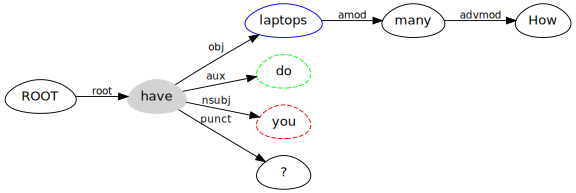

In [34]:
viz_sample('en', "How many laptops do you have?")

有 --> 你|SBV|r|O
？ --> 有|HED|v|O
台 --> 几|ATT|m|O
笔记本 --> 台|ATT|q|O
电脑 --> 笔记本|ATT|n|O
有 --> 电脑|VOB|n|O
有 --> ？|WP|wp|O
verb_domains(有) _


,rel,index,text,lemma,children,features
0,sbv,1,你,你,[你],"[c_pron, x_r]"
1,vob,6,电脑,电脑,"[几, 台, 笔记本, 电脑]","[c_noun, x_n]"
2,wp,7,？,？,[？],"[c_punct, x_wp]"


vob -> 几 台 笔记本 电脑
index: 1	text: 你 	lemma: 你	upos: PRON	xpos: r
index: 2	text: 有 	lemma: 有	upos: VERB	xpos: v
index: 3	text: 几 	lemma: 几	upos: NUM	xpos: m
index: 4	text: 台 	lemma: 台	upos: X	xpos: q
index: 5	text: 笔记本 	lemma: 笔记本	upos: NOUN	xpos: n
index: 6	text: 电脑 	lemma: 电脑	upos: NOUN	xpos: n
index: 7	text: ？ 	lemma: ？	upos: PUNCT	xpos: wp
你 -> sbv, 2, 有
有 -> hed, 0, _root_
几 -> att, 4, 台
台 -> att, 5, 笔记本
笔记本 -> att, 6, 电脑
电脑 -> vob, 2, 有
？ -> wp, 2, 有
('你', 2, 'sbv')
('有', 0, 'hed')
('几', 4, 'att')
('台', 5, 'att')
('笔记本', 6, 'att')
('电脑', 2, 'vob')
('？', 2, 'wp')


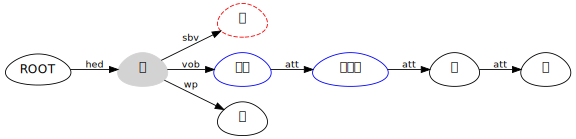

In [35]:
viz_sample('zh', "你有几台笔记本电脑？", 'ltp')

verb_domains(ある) _


,rel,index,text,lemma,children,features
0,nsubj,1,ラップトップ,ラップトップ,"[ラップトップ, は]",[c_propn]
1,advmod,3,いくつ,いくつ,[いくつ],[c_adv]
2,aux,5,ます,ます,[ます],[c_aux]
3,mark,6,か,か,[か],[c_part]
4,punct,7,？,？,[？],[c_punct]


nsubj -> ラップトップ は
index: 1	text: ラップトップ 	lemma: ラップトップ	upos: PROPN	xpos: _
index: 2	text: は 	lemma: は	upos: ADP	xpos: _
index: 3	text: いくつ 	lemma: いくつ	upos: ADV	xpos: _
index: 4	text: あり 	lemma: ある	upos: VERB	xpos: _
index: 5	text: ます 	lemma: ます	upos: AUX	xpos: _
index: 6	text: か 	lemma: か	upos: PART	xpos: _
index: 7	text: ？ 	lemma: ？	upos: PUNCT	xpos: _
ラップトップ -> nsubj, 4, あり
は -> case, 1, ラップトップ
いくつ -> advmod, 4, あり
あり -> root, 0, _root_
ます -> aux, 4, あり
か -> mark, 4, あり
？ -> punct, 4, あり
('ラップトップ', '4', 'nsubj')
('は', '1', 'case')
('いくつ', '4', 'advmod')
('あり', '0', 'root')
('ます', '4', 'aux')
('か', '4', 'mark')
('？', '4', 'punct')


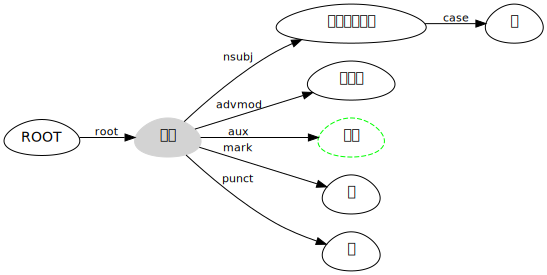

In [36]:
viz_sample('ja', "ラップトップはいくつありますか？")

❶ verb_domains(have) _


,rel,index,text,lemma,children,features
0,nsubj,1,I,I,[I],"[c_pron, x_prp]"
1,xcomp,4,turn,turn,"[to, turn, off, the, lights, in, the, room]","[c_verb, x_vb]"
2,punct,11,.,.,[.],"[c_punct, x_.]"


xcomp -> to turn off the light in the room
index: 1	text: I 	lemma: I	upos: PRON	xpos: PRP
index: 2	text: have 	lemma: have	upos: VERB	xpos: VBP
index: 3	text: to 	lemma: to	upos: PART	xpos: TO
index: 4	text: turn 	lemma: turn	upos: VERB	xpos: VB
index: 5	text: off 	lemma: off	upos: ADP	xpos: RP
index: 6	text: the 	lemma: the	upos: DET	xpos: DT
index: 7	text: lights 	lemma: light	upos: NOUN	xpos: NNS
index: 8	text: in 	lemma: in	upos: ADP	xpos: IN
index: 9	text: the 	lemma: the	upos: DET	xpos: DT
index: 10	text: room 	lemma: room	upos: NOUN	xpos: NN
index: 11	text: . 	lemma: .	upos: PUNCT	xpos: .
I -> nsubj, 2, have
have -> root, 0, _root_
to -> mark, 4, turn
turn -> xcomp, 2, have
off -> compound:prt, 4, turn
the -> det, 7, lights
lights -> obj, 4, turn
in -> case, 10, room
the -> det, 10, room
room -> obl, 4, turn
. -> punct, 2, have
('I', '2', 'nsubj')
('have', '0', 'root')
('to', '4', 'mark')
('turn', '2', 'xcomp')
('off', '4', 'compound:prt')
('the', '7', 'det')
('lights', '4', 'o

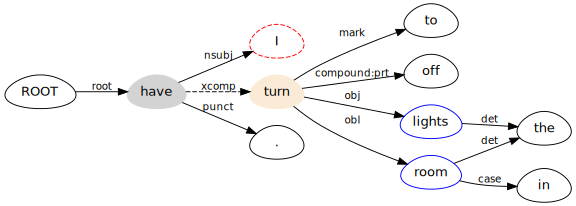

In [44]:
en="I have to turn off the lights in the room."
zh="我必须关掉房间里的灯。"
ja="部屋の明かりを消さなければなりません。"
viz_sample('en', en)

关掉 --> 我|SBV|r|O
关掉 --> 必须|ADV|d|O
。 --> 关掉|HED|v|O
里 --> 房间|ATT|n|O
灯 --> 里|ATT|nd|O
里 --> 的|RAD|u|O
关掉 --> 灯|VOB|n|O
关掉 --> 。|WP|wp|O
❶ verb_domains(关掉) _


,rel,index,text,lemma,children,features
0,sbv,1,我,我,[我],"[c_pron, x_r]"
1,adv,2,必须,必须,[必须],"[c_adv, x_d]"
2,vob,7,灯,灯,"[房间, 里, 的, 灯]","[c_noun, x_n]"
3,wp,8,。,。,[。],"[c_punct, x_wp]"


vob -> 房间 里 的 灯
index: 1	text: 我 	lemma: 我	upos: PRON	xpos: r
index: 2	text: 必须 	lemma: 必须	upos: ADV	xpos: d
index: 3	text: 关掉 	lemma: 关掉	upos: VERB	xpos: v
index: 4	text: 房间 	lemma: 房间	upos: NOUN	xpos: n
index: 5	text: 里 	lemma: 里	upos: NOUN	xpos: nd
index: 6	text: 的 	lemma: 的	upos: AUX	xpos: u
index: 7	text: 灯 	lemma: 灯	upos: NOUN	xpos: n
index: 8	text: 。 	lemma: 。	upos: PUNCT	xpos: wp
我 -> sbv, 3, 关掉
必须 -> adv, 3, 关掉
关掉 -> hed, 0, _root_
房间 -> att, 5, 里
里 -> att, 7, 灯
的 -> rad, 5, 里
灯 -> vob, 3, 关掉
。 -> wp, 3, 关掉
('我', 3, 'sbv')
('必须', 3, 'adv')
('关掉', 0, 'hed')
('房间', 5, 'att')
('里', 7, 'att')
('的', 5, 'rad')
('灯', 3, 'vob')
('。', 3, 'wp')


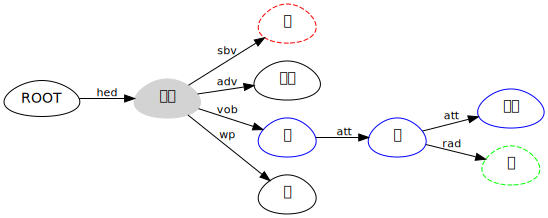

In [42]:
viz_sample('zh', zh, 'ltp')

❶ verb_domains(消す) _


,rel,index,text,lemma,children,features
0,obj,3,明かり,明かる,"[部屋, の, 明かり, を]",[c_noun]
1,aux,6,なけれ,ない,[なけれ],[c_aux]
2,mark,7,ば,ば,[ば],[c_sconj]


obj -> 部屋 の 明かる を
❷ verb_domains(なる) _


,rel,index,text,lemma,children,features
0,advcl,5,消さ,消す,"[部屋, の, 明かり, を, 消さ, なけれ, ば]",[c_verb]
1,aux,9,ませ,ます,[ませ],[c_aux]
2,aux,10,ん,ない,[ん],[c_aux]
3,punct,11,。,。,[。],[c_punct]


advcl -> 部屋 の 明かる を 消す ない ば
index: 1	text: 部屋 	lemma: 部屋	upos: NOUN	xpos: _
index: 2	text: の 	lemma: の	upos: ADP	xpos: _
index: 3	text: 明かり 	lemma: 明かる	upos: NOUN	xpos: _
index: 4	text: を 	lemma: を	upos: ADP	xpos: _
index: 5	text: 消さ 	lemma: 消す	upos: VERB	xpos: _
index: 6	text: なけれ 	lemma: ない	upos: AUX	xpos: _
index: 7	text: ば 	lemma: ば	upos: SCONJ	xpos: _
index: 8	text: なり 	lemma: なる	upos: VERB	xpos: _
index: 9	text: ませ 	lemma: ます	upos: AUX	xpos: _
index: 10	text: ん 	lemma: ない	upos: AUX	xpos: _
index: 11	text: 。 	lemma: 。	upos: PUNCT	xpos: _
部屋 -> nmod, 3, 明かり
の -> case, 1, 部屋
明かり -> obj, 5, 消さ
を -> case, 3, 明かり
消さ -> advcl, 8, なり
なけれ -> aux, 5, 消さ
ば -> mark, 5, 消さ
なり -> root, 0, _root_
ませ -> aux, 8, なり
ん -> aux, 8, なり
。 -> punct, 8, なり
('部屋', '3', 'nmod')
('の', '1', 'case')
('明かり', '5', 'obj')
('を', '3', 'case')
('消さ', '8', 'advcl')
('なけれ', '5', 'aux')
('ば', '5', 'mark')
('なり', '0', 'root')
('ませ', '8', 'aux')
('ん', '8', 'aux')
('。', '8', 'punct')


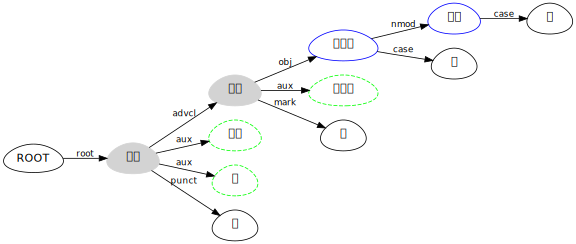

In [43]:
viz_sample('ja', ja)